# Numerical Simulation of the 2-Body Problem

In [1]:
import numpy as np
import matplotlib.pyplot as plt

## _i)_

In [28]:

def euler(w0,s0,h,e):
      #the function will take the initial velocity
    # initial position, the whished step size 
    # and the desired upper bondary for the integral
    
    G = 1 #grativational constant
    m = 1 #mass of both bodies
    N = int(e/h) #time steps
    
    s = np.zeros((N,2))
    w = np.zeros((N,2))
    LRL = np.zeros((N,2))
    s[0] = s0
    w[0] = w0
    #leap-frog algorith
    for i in range(N-1):
        s[i+1] = s[i] + h*w[i]
        w[i+1] = w[i]-h*s[i]/np.linalg.norm(s[i])**3
         #calculatin LRl for every time step
        LRL[i] = s[i]*(np.dot(w[i],w[i])) - w[i]*(np.dot(s[i],w[i])) - s[i]/np.linalg.norm(s[i])

    #calculating eccentrisity with LRL
    epsilon = np.mean([np.linalg.norm(x) for x in LRL])
    print(np.linalg.norm(LRL[1]))
    #calculatin eccentrisity geometrically
    a = max(s[:,0])- min(s[:,0])
    b = max(s[:,1])-min(s[:,1])
    print(a)
    print(b)
    epsilon2 = np.sqrt(abs(1-a**2/b**2))
    print('epislon calculated geometrically :{:.3}'.format(epsilon2))
    #plot
    fig1, ax1 = plt.subplots()
    t = np.linspace(0,e,N)
    ax1.plot(t,s[:,1], label= r'$\omega$$_0$ = {} $\quad$s$_0$ = {},$\quad$ $\;$ dt = {}'.format(w0,s0,h))
    plt.title('Motion of 2-body problem body problem with $\epsilon = {:.3}$'.format(epsilon))
    plt.xlabel(' time t')
    plt.ylabel('relative position $s_1$')
    plt.legend(loc = 8)
    fig2, ax2 = plt.subplots()
    ax2.plot(s[:,0], s[:,1],  label= r'$\omega$$_0$ = {} $\quad$s$_0$ = {},$\quad$ $\;$ dt = {}'.format(w0,s0,h))
    plt.title('Orbit of the 2-body problem with $\epsilon = {:.3}$'.format(epsilon))
    plt.xlabel('relative position $s_1$')
    plt.ylabel('relative position $s_2$')
    plt.legend(loc = 8)
    return s,w


1.5000003749539096e-06
2.1054507526942885
2.0993082373604404
epislon calculated geometrically :0.0766


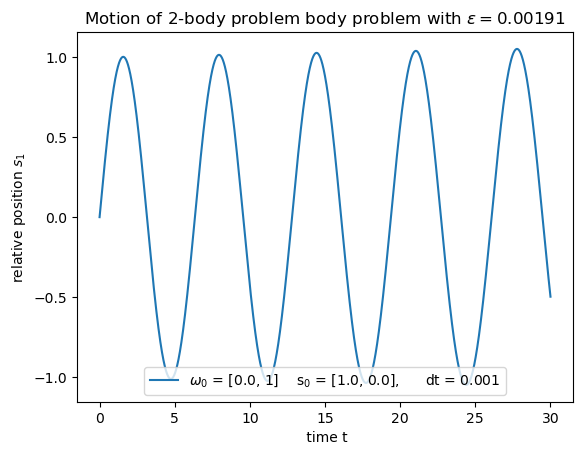

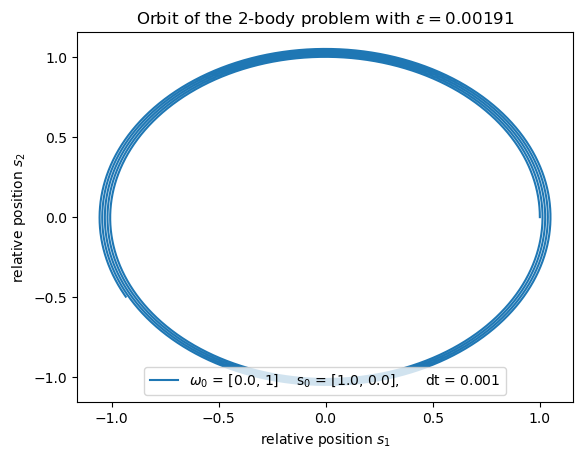

In [3]:
w1 = [0.0,1]
s1=[1.0,0.0]
euler(w1,s1,0.001,30)

In [4]:
def leap_frog(w0,s0,h,e):
     #the function will take the initial velocity
    # initial position, the whished step size 
    # and the desired upper bondary for the integral
    G = 1 #grativational constant
    m = 1 #mass of both bodies
    N = int(e/h) #time steps
    
    s = np.zeros((N,2))
    w = np.zeros((N,2))
    LRL = np.zeros((N,2))

    w[0] = w0
    s[0] = s0

    #First the programm will compute the s_1/2 step using the
    #euler forward methode
    a = 0.5*h/np.linalg.norm(s0)**3
    wn = w[0] - h/2*s[0]/np.linalg.norm(s[0])
    s[0] = s0 + h*wn
    
    #leap-frog algorith
    for i in range(N-1):
        w[i + 1] = w[i]-h/2*s[i]/np.linalg.norm(s[i])**3
        s[i + 1] = s[i] + w[i]*h
         #calculatin LRl for every time step
        LRL[i] = s[i]*(np.dot(w[i],w[i])) - w[i]*(np.dot(s[i],w[i])) - s[i]/np.linalg.norm(s[i])

    #calculating eccentrisity with LRL
    epsilon = np.mean([np.linalg.norm(x) for x in LRL])
    #calculatin eccentrisity geometrically
    a = max(s[:,0])- min(s[:,0])
    b = max(s[:,1])-min(s[:,1])
    print(a)
    print(b)
    epsilon2 = np.sqrt(abs(1-b**2/a**2))
    print('epislon calculated geometrically :{:.3}'.format(epsilon2))
    #plot
    fig1, ax1 = plt.subplots()
    t = np.linspace(0,e,N)
    ax1.plot(t,s[:,1], label= r'$\omega$$_0$ = {} $\quad$s$_0$ = {},$\quad$ $\;$ dt = {}'.format(w0,s0,h))
    plt.title('Motion of 2 body problem with $\epsilon$ = {:.3}'.format(epsilon))
    plt.xlabel(' time t')
    plt.ylabel('relative position $s_1$')
    plt.legend(loc = 8)
    fig2, ax2 = plt.subplots()
    ax2.plot(s[:,0], s[:,1],  label= r'$\omega$$_0$ = {} $\quad$s$_0$ = {},$\quad$ $\;$ dt = {}'.format(s0,w0,h))
    plt.title('Orbit of the 2-body problem with $\epsilon$ = {:.3}'.format(epsilon))
    plt.xlabel('relative position $s_1$')
    plt.ylabel('relative position $s_2$')
    plt.legend(loc = 8)

1.992265652834932
1.9961493469569298
epislon calculated geometrically :0.0625


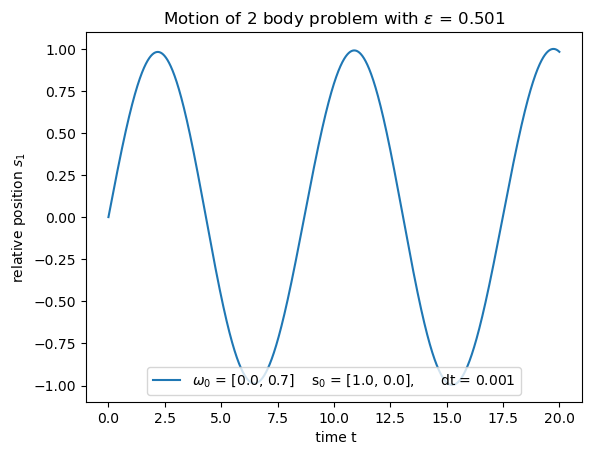

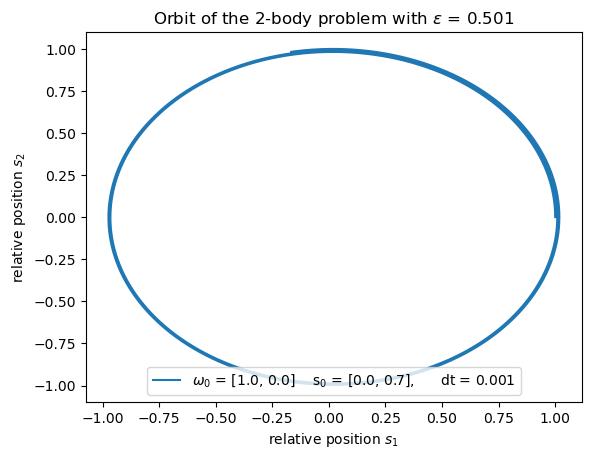

In [5]:
w2 = [0.0,.70]
s2=[1.0,0.0]
leap_frog(w2,s2,0.001,20)

# _ii)_

After changing the paramters of the Euler Forward Method it has been stablished, that due to the errors of this method it is not posible to get a perfect circle with radius 1. However with $\omega_0$ =(0, 1.0) the programm delivers a good approximation. In the other hand,  for the leap-frog algorith to deliver a good approximation the inital velocity has to be set to $\omega_0$ = (0,0.7)

## _iii)_

0.00015000374993734167
2.7516943302449928
2.6964787836941415
epislon calculated geometrically :0.203


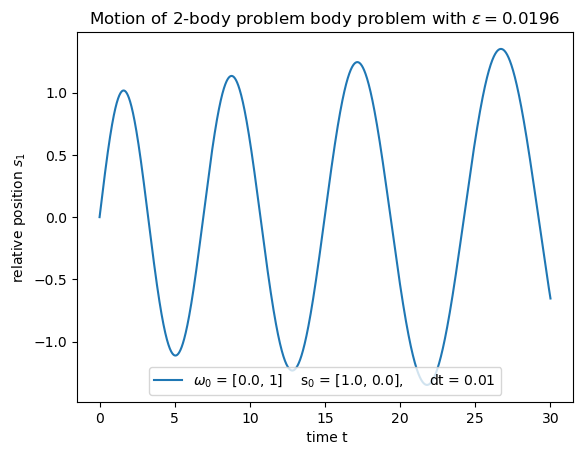

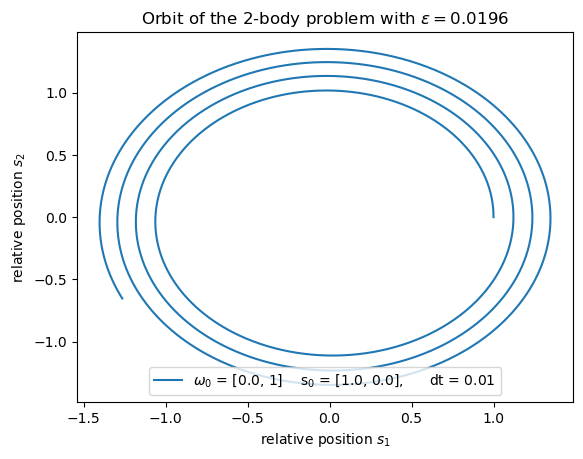

In [6]:
w1 = [0.0,1]
s1=[1.0,0.0]
euler(w1,s1,0.01,30)

4.241240714984339
4.1951887488190645
epislon calculated geometrically :0.147


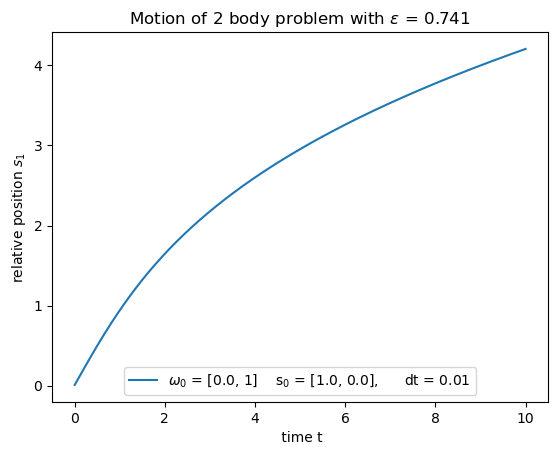

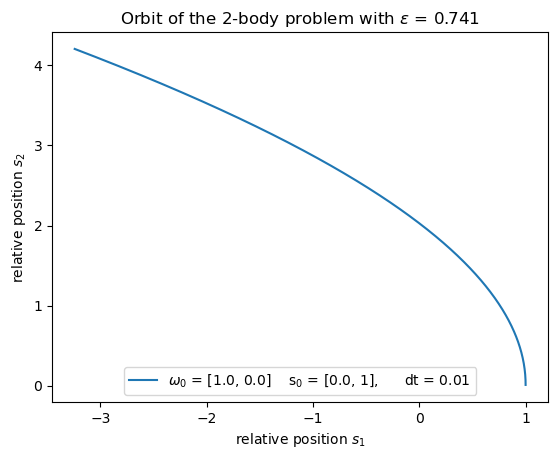

In [7]:
leap_frog(w1,s1,0.01,10)
#for the leap_frog algorith the increase in the distance is lower about 0.01%

If the time step is increased the exactitude of both methods decrease greatlly. The Euler Method plots a piral trajectory, meanwhile the leap-frog algorithm shows a hyperbola.

## _v)_

1.0000029999985007
5.808259981521099
4.827925218332602
epislon calculated geometrically :0.669


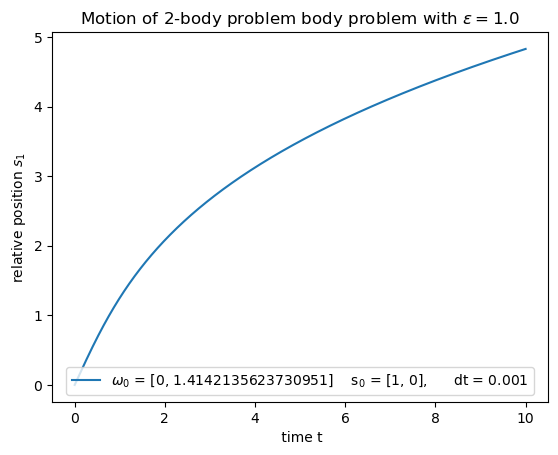

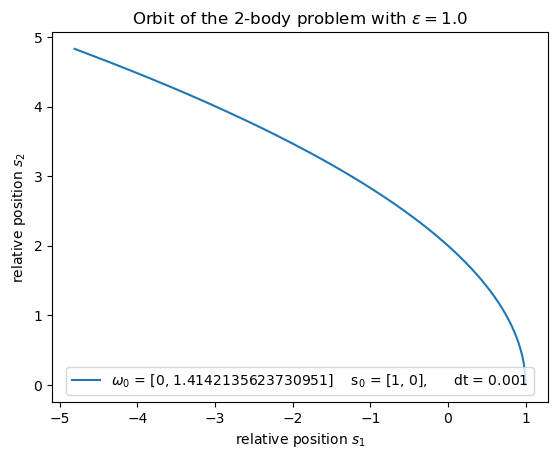

In [8]:
euler([0,np.sqrt(2)],[1,0], 0.001,10)

3.3165115257055158
10.712525087721502
epislon calculated geometrically :3.07


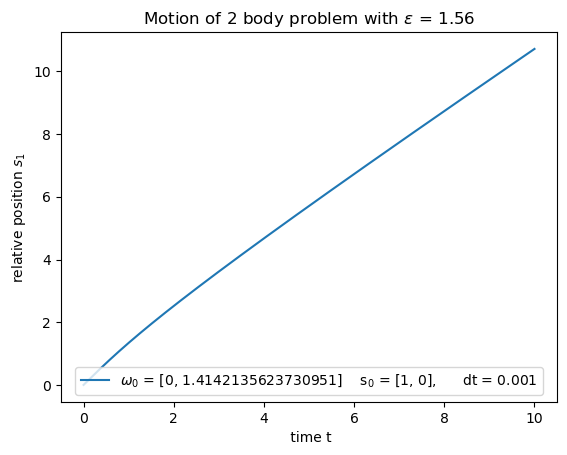

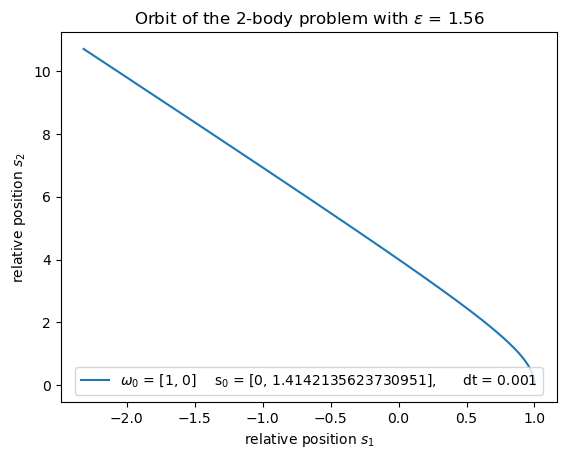

In [9]:
leap_frog([0,np.sqrt(2)],[1,0], 0.001,10)

0.49999999250000005
1.3480258576967694
1.1675373818253267
epislon calculated geometrically :0.577


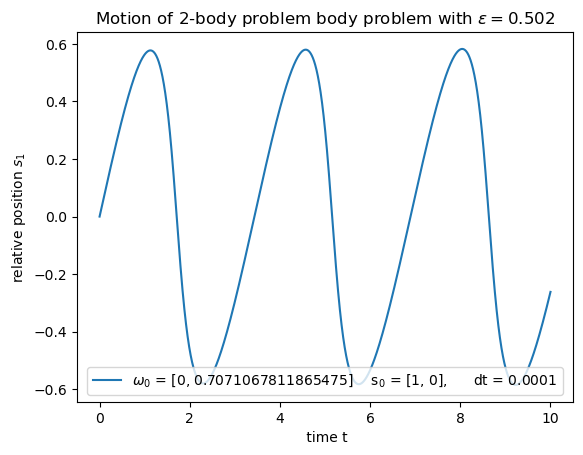

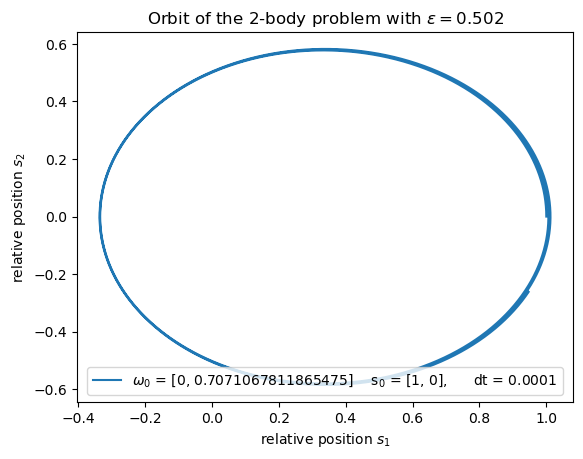

In [10]:
euler([0,1/np.sqrt(2)],[1,0], 0.0001,10)

0.9374999990624999
8.916320592151196
0.8093261724427312
epislon calculated geometrically :11.0


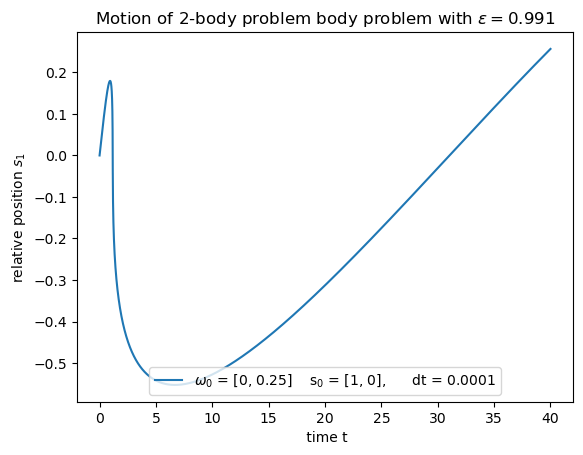

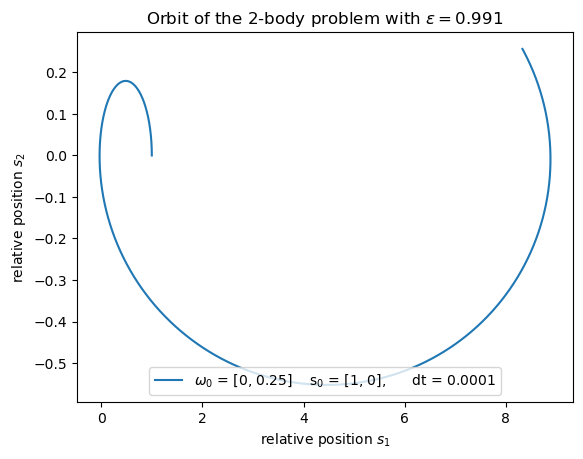

In [15]:
euler([0,1/4],[1,0], 0.0001,40)

2.001332646540053
2.000888510189057
epislon calculated geometrically :0.0211


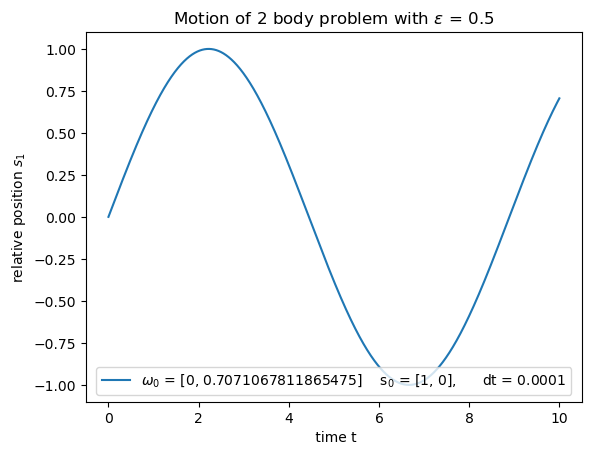

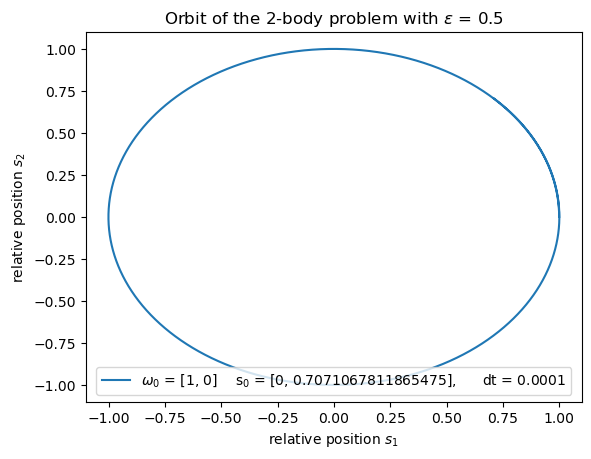

In [12]:
leap_frog([0,1/np.sqrt(2)],[1,0], 0.0001,10)

1.3808830743106262
0.5770487824456738
epislon calculated geometrically :0.909


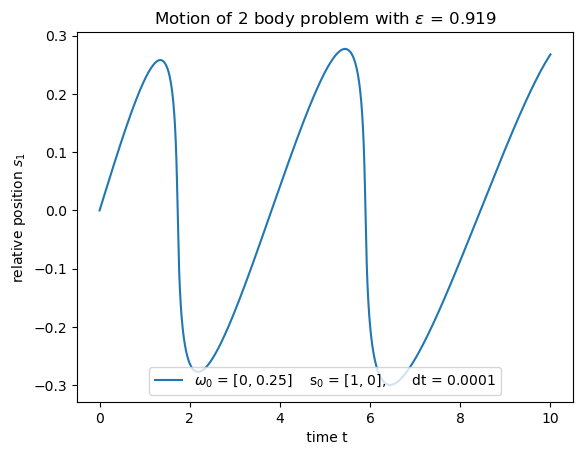

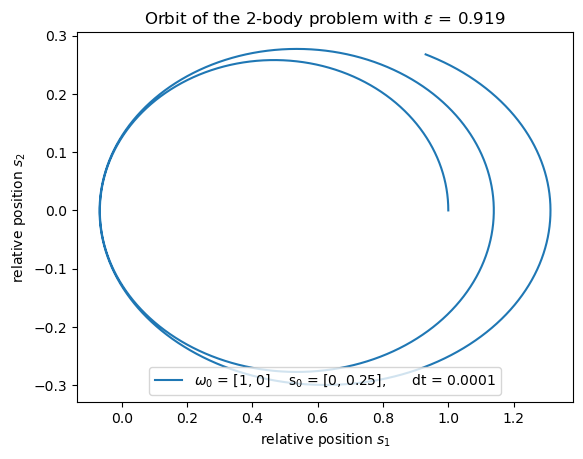

In [14]:
leap_frog([0,1/4],[1,0], 0.0001,10)

# Error Analysis

## a) Euler methode

0.015037437733209797
4.752794399746748
5.07943758093948
epislon calculated geometrically :0.353


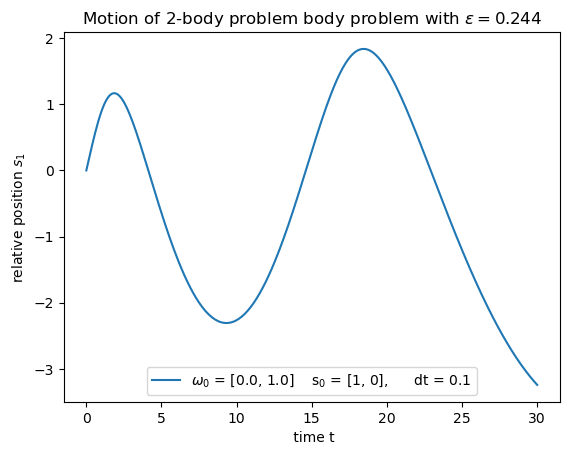

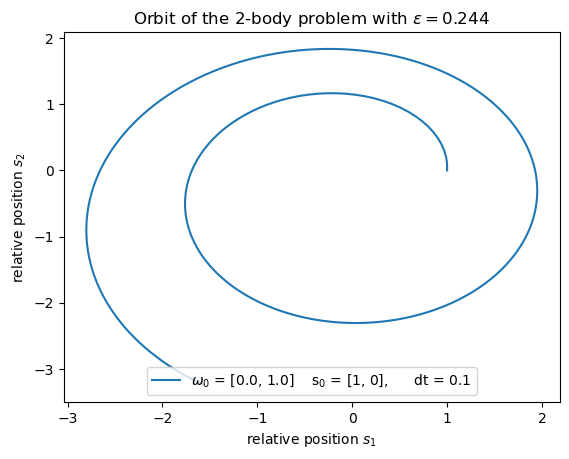

In [17]:
euler([0.0,1.0],[1,0], 0.1,30)

0.00015000374993734167
2.7516943302449928
2.6964787836941415
epislon calculated geometrically :0.203


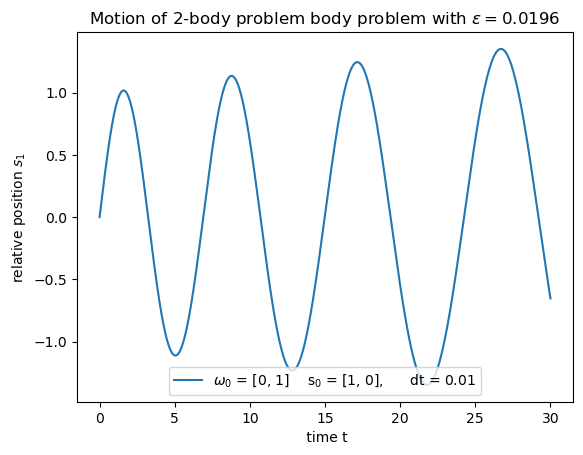

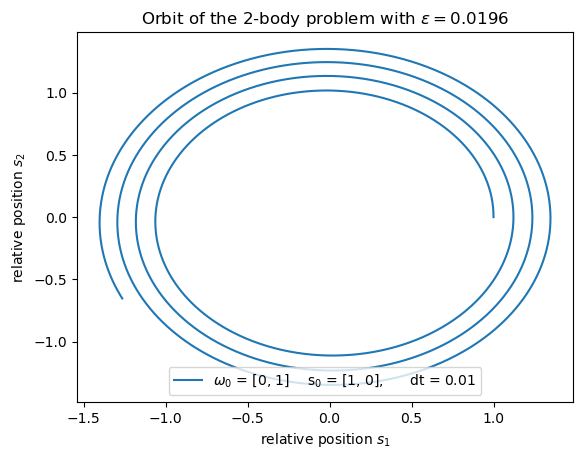

In [21]:
euler([0,1],[1,0], 0.01,30)

1.5000003749539096e-06
2.1054507526942885
2.0993082373604404
epislon calculated geometrically :0.0766


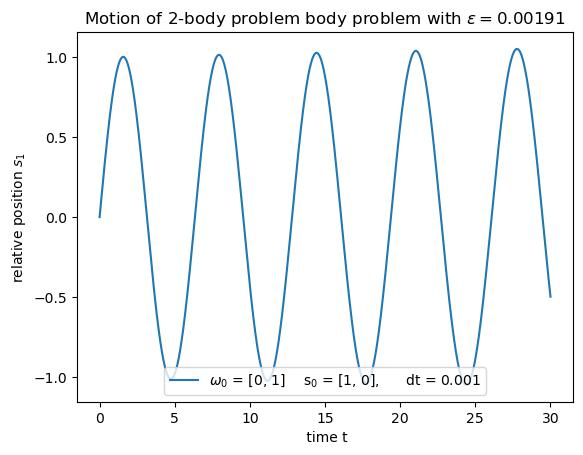

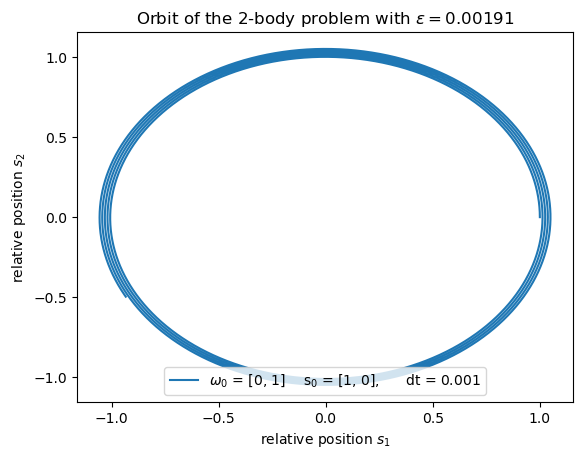

In [22]:
euler([0,1],[1,0], 0.001,30)

1.4999999983837935e-08
2.010667350537004
2.011294139221177
epislon calculated geometrically :0.025


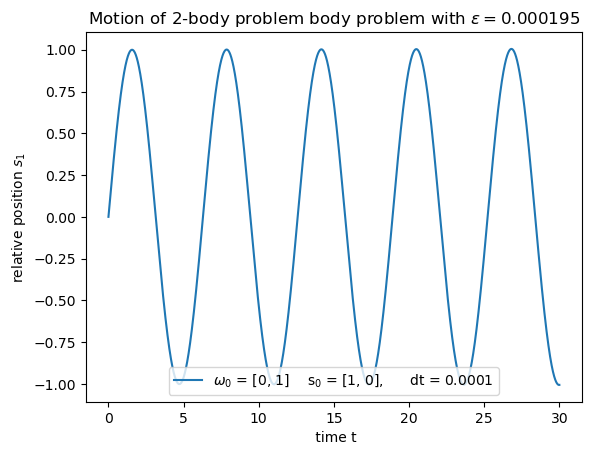

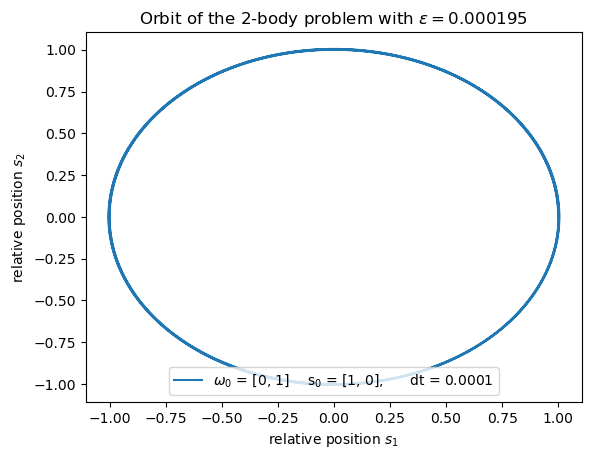

In [23]:
euler([0,1],[1,0], 0.0001,30)

0.492510128054849
2.977027276312855
6.78091153839325
epislon calculated geometrically :0.898


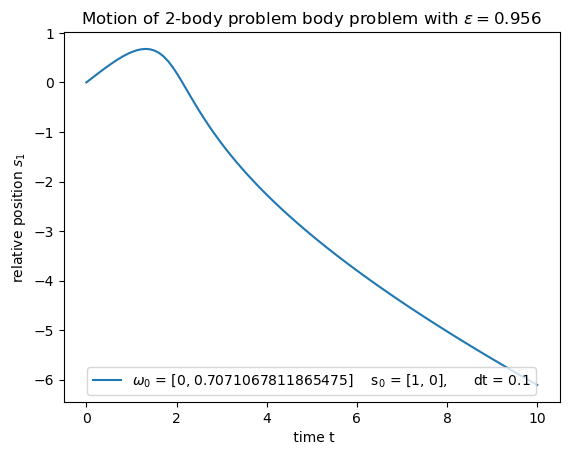

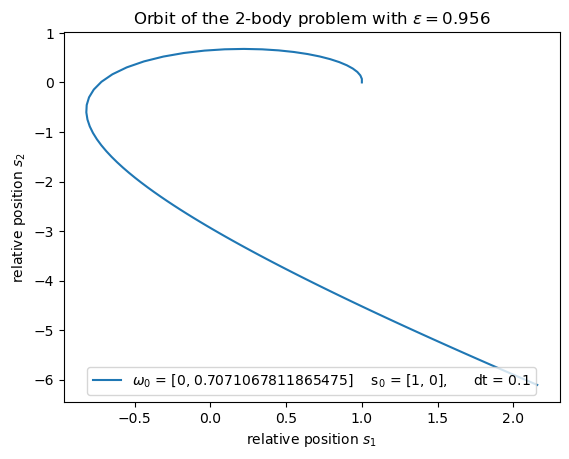

In [24]:
euler([0,1/np.sqrt(2)],[1,0], 0.1,10)

0.4999250009382423
2.1810763825379444
1.9697271277033543
epislon calculated geometrically :0.476


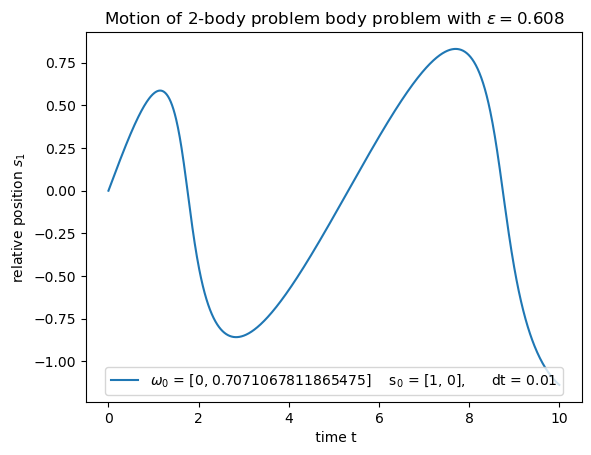

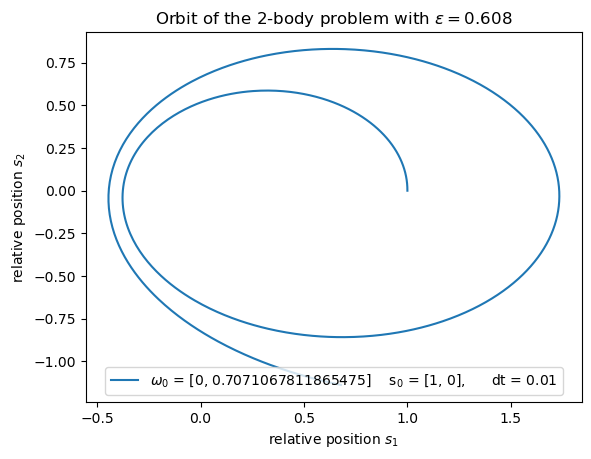

In [25]:
euler([0,1/np.sqrt(2)],[1,0], 0.01,10)

0.0
0.0
2.68700576850888
epislon calculated geometrically :1.0


(array([[1.        , 0.        ],
        [1.        , 2.68700577]]),
 array([[ 0.        ,  0.70710678],
        [-3.8       ,  0.70710678]]))

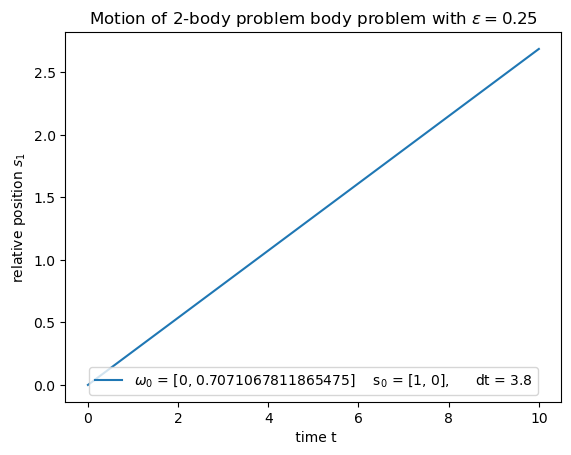

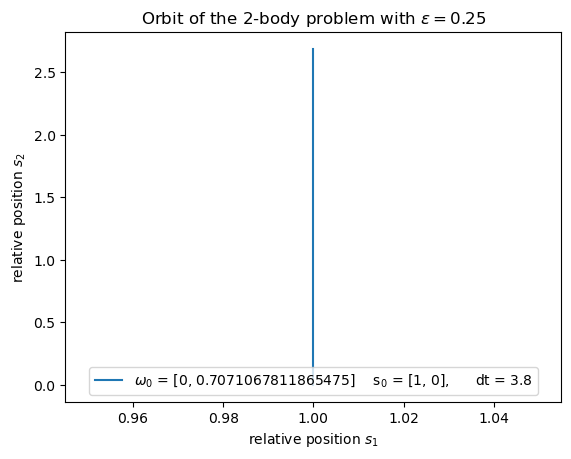

In [76]:
euler([0,1/np.sqrt(2)],[1,0], 3.8,10)

0.49999999250000005
1.3480258576967694
1.1675373818253267
epislon calculated geometrically :0.577


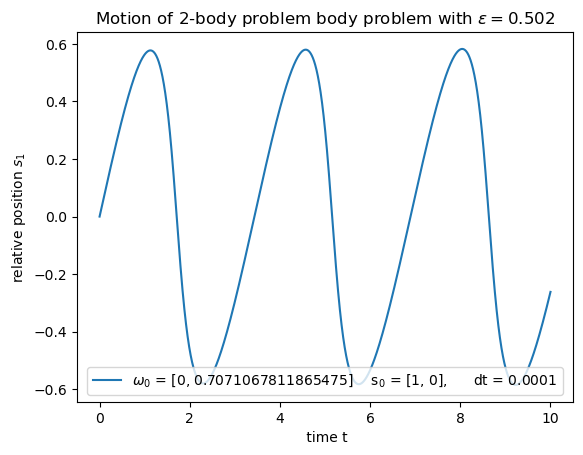

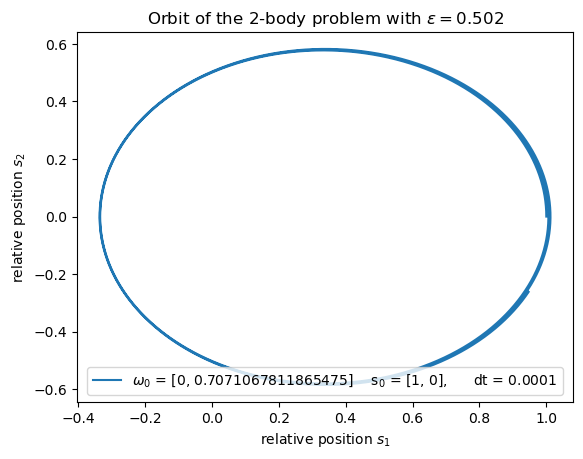

In [27]:
euler([0,1/np.sqrt(2)],[1,0], 0.0001,10)

In [83]:
#computing the energie of the motion and plotting it

def euler_0(w0,s0,h,e):
    #the function will take the initial velocity
    # initial position, the whished step size 
    # and the desired upper bondary for the integral
    
    G = 1 #grativational constant
    m = 1 #mass of both bodies
    N = int(e/h) #time steps
    
    s = np.zeros((N,2))
    w = np.zeros((N,2))
    LRL = np.zeros((N,2))
    s[0] = s0
    w[0] = w0
    #leap-frog algorith
    for i in range(N-1):
        s[i+1] = s[i] + h*w[i]
        w[i+1] = w[i]-h*s[i]/np.linalg.norm(s[i])**3
    return w

def energy_em(w0,s0,dt,e):
    # dt should be a list with initila and final ime step for which the difference of energy has
    # to be computed
    # w0 is the initial velocity, s0, initila position 
    # and e the time span in which the motion will take place
    
    dt = np.arange(dt[0], dt[-1], 0.1) #list of dt to be consider
    E = np.array([]) 
    
    #computiong the error in the energy
    for i in dt:
        w = euler_0(w0,s0,i,e)
        e_i = 1/2*np.dot(w[0],w[0]) #energy at beginning of motion
        e_f = 1/2*np.dot(w[-1],w[-1]) #energy at end of motion
        E = np.append(E, abs(e_f-e_i))
        
    #plotting error as funktion of dt
    plt.loglog(dt,E)
    plt.title(r'Error of energy as fucntion of time step, Euler Methode')
    plt.xlabel(r'time step $dt$')
    plt.ylabel(r'Error of energy $\Delta$ $E$')
    print(dt)
    print()
    print(E)

[1.0000e-04 1.0010e-01 2.0010e-01 3.0010e-01 4.0010e-01 5.0010e-01
 6.0010e-01 7.0010e-01 8.0010e-01 9.0010e-01 1.0001e+00 1.1001e+00
 1.2001e+00 1.3001e+00 1.4001e+00 1.5001e+00 1.6001e+00 1.7001e+00
 1.8001e+00 1.9001e+00 2.0001e+00 2.1001e+00 2.2001e+00 2.3001e+00
 2.4001e+00 2.5001e+00 2.6001e+00 2.7001e+00 2.8001e+00 2.9001e+00
 3.0001e+00 3.1001e+00 3.2001e+00 3.3001e+00 3.4001e+00 3.5001e+00
 3.6001e+00 3.7001e+00 3.8001e+00 3.9001e+00 4.0001e+00 4.1001e+00
 4.2001e+00 4.3001e+00 4.4001e+00 4.5001e+00 4.6001e+00 4.7001e+00
 4.8001e+00 4.9001e+00 5.0001e+00 5.1001e+00 5.2001e+00 5.3001e+00
 5.4001e+00 5.5001e+00 5.6001e+00 5.7001e+00 5.8001e+00 5.9001e+00]

[ 0.02945838  0.03610472  0.0529069   0.10374135  0.15885144  0.2156045
  0.27591036  0.34284985  0.42363654  0.50068126  0.60675802  0.69698256
  0.82866947  0.98541209  1.13792351  1.33209797  1.50990621  1.73431401
  1.92695346  2.12763023  2.39696296  2.60742929  2.82609298  3.05307877
  3.28856534  3.68189761  3.92516049 

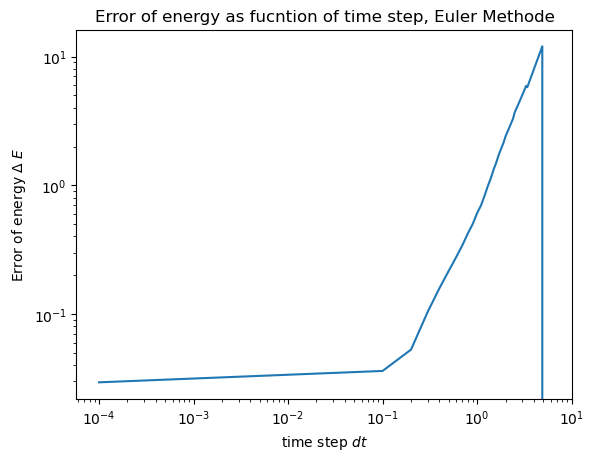

In [84]:
energy_em([0,1/np.sqrt(2)],[1,0], [0.0001,6],10)

The results are as expected till $dt$ > 4, at this point the simulation is so erroneous, that the result of the Euler Method is a linear trajectory, for which the Energy is constant. A constant energy is the ideal case, as it is visible for $dt\to $ 0, however if the trajectory is erroneously integrated, this result can't be taken as a correct one. 

## b) leap-frog algorithm

3.895588310504747
4.416367359310763
epislon calculated geometrically :0.534


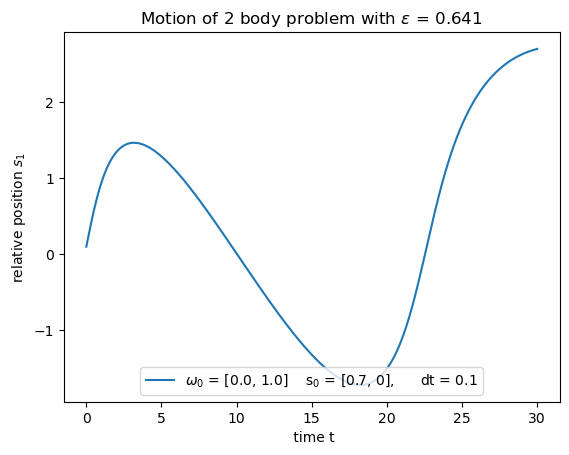

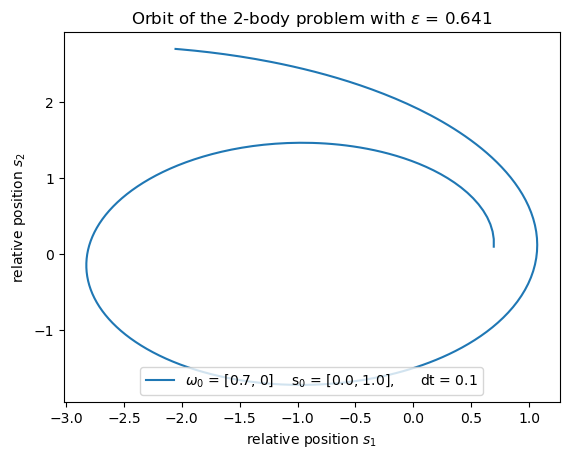

In [92]:
leap_frog([0.0,1.0],[0.7,0], 0.1,30)

2.773665244342849
2.5827428157153465
epislon calculated geometrically :0.365


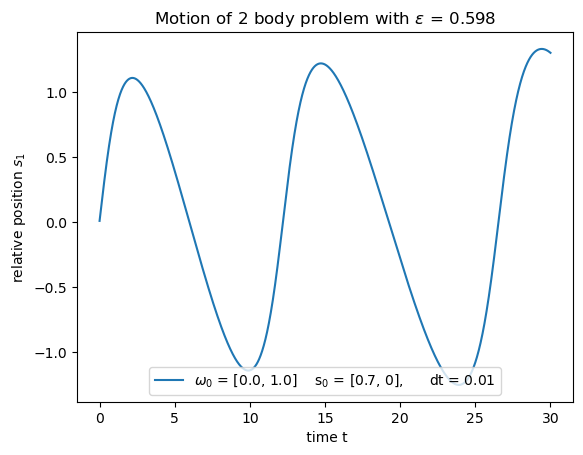

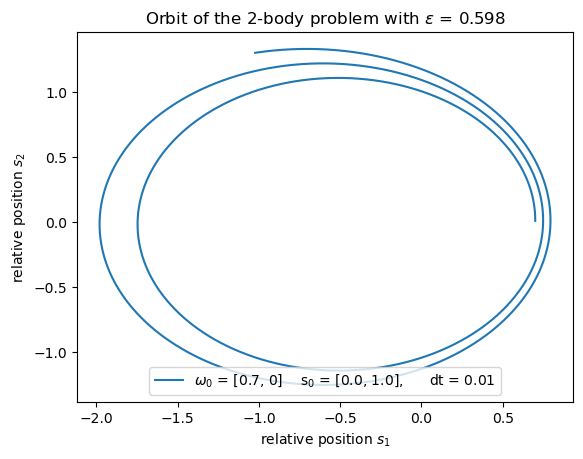

In [91]:
leap_frog([0.0,1.0],[0.7,0], 0.01,30)

2.010055015594763
2.0139096011602406
epislon calculated geometrically :0.062


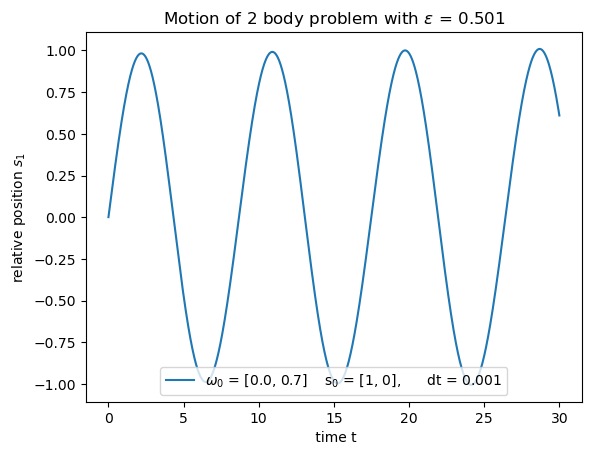

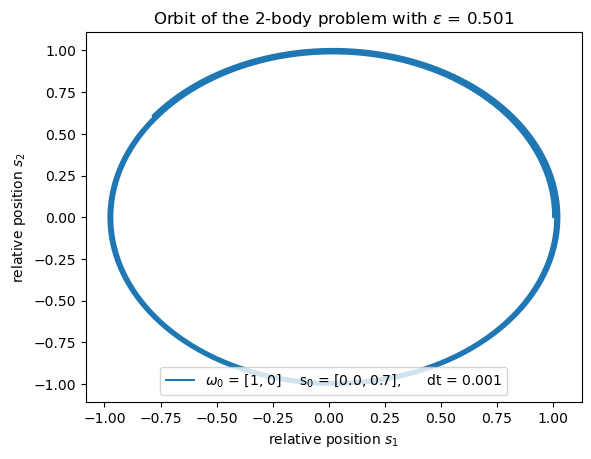

In [90]:
leap_frog([0.0,0.7],[1,0], 0.001,30)

2.3399526917437283
2.1430118545307777
epislon calculated geometrically :0.402


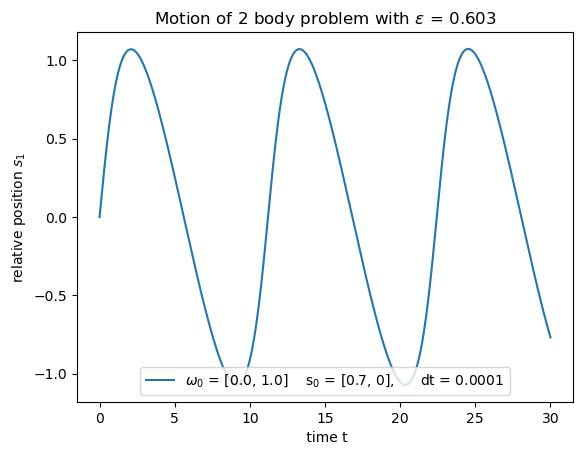

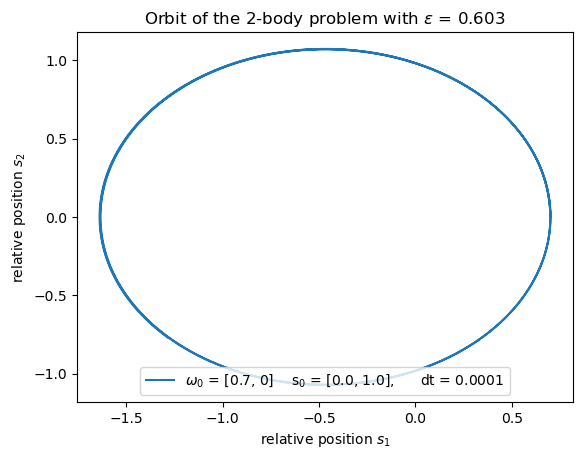

In [93]:
leap_frog([0.0,1.0],[0.7,0], 0.0001,30)

9.115157067317028
7.758732521682457
epislon calculated geometrically :0.525


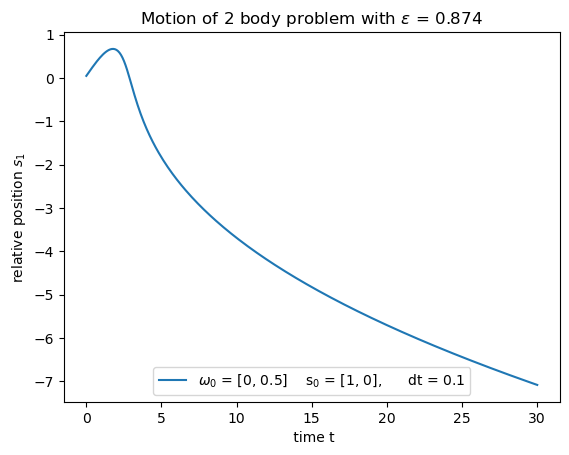

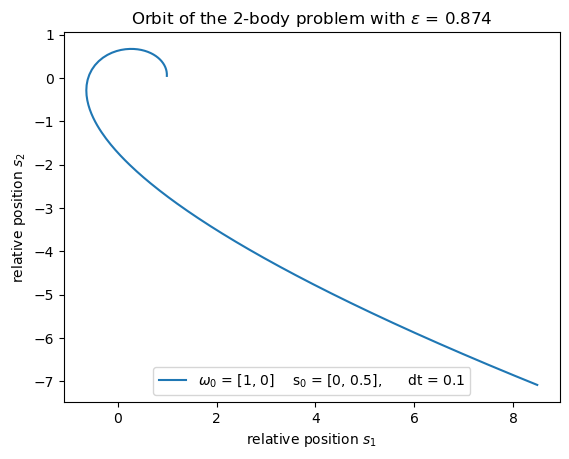

In [97]:
leap_frog([0,1/2],[1,0], 0.1,30)

3.0464735953711406
2.191182322829405
epislon calculated geometrically :0.695


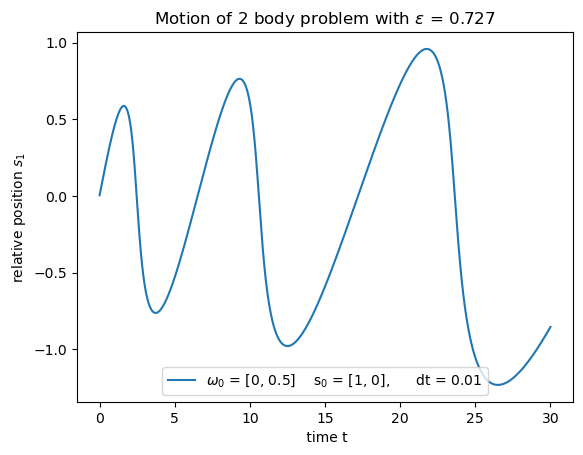

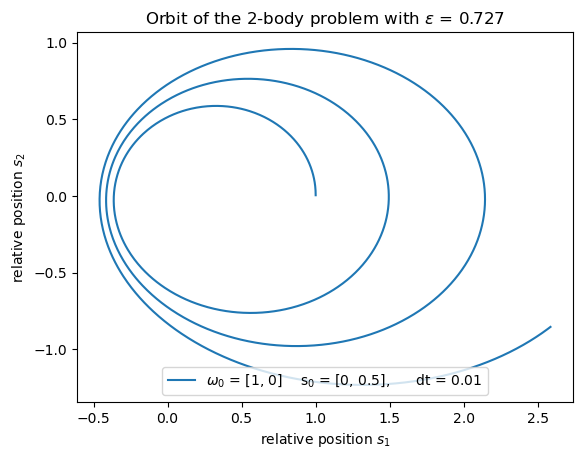

In [98]:
leap_frog([0,1/2],[1,0], 0.01,30)

1.5934798580931757
1.3383089210857317
epislon calculated geometrically :0.543


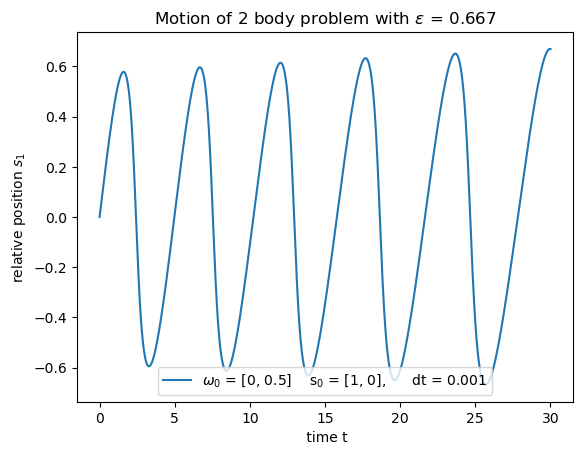

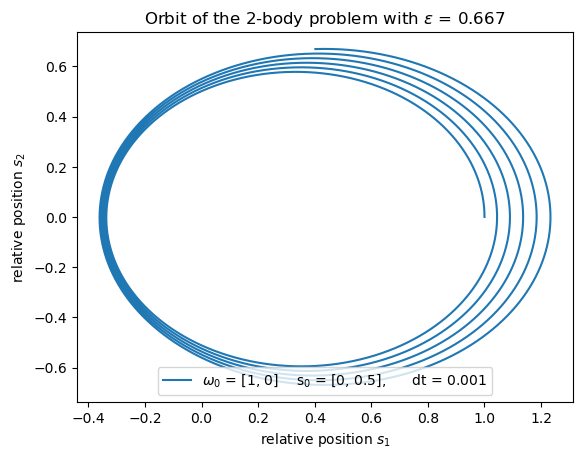

In [99]:
leap_frog([0,1/2],[1,0], 0.001,30)

1.3633362003576284
1.1746748370316924
epislon calculated geometrically :0.508


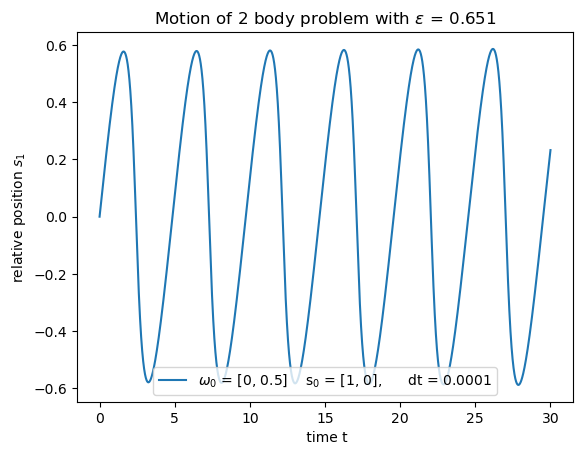

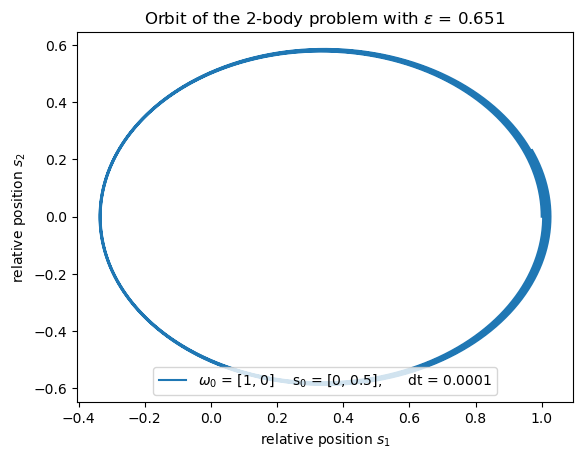

In [100]:
leap_frog([0,1/2],[1,0], 0.0001,30)

In [105]:
def leap_frog_0(w0,s0,h,e):
    #the function will take the initial velocity
    # initial position, the whished step size 
    # and the desired upper bondary for the integral
    G = 1 #grativational constant
    m = 1 #mass of both bodies
    N = int(e/h) #time steps
    
    s = np.zeros((N,2))
    w = np.zeros((N,2))
    LRL = np.zeros((N,2))

    w[0] = w0
    s[0] = s0

    #First the programm will compute the s_1/2 step using the
    #euler forward methode
    a = 0.5*h/np.linalg.norm(s0)**3
    wn = w[0] - h/2*s[0]/np.linalg.norm(s[0])
    s[0] = s0 + h*wn
    
    #leap-frog algorith
    for i in range(N-1):
        w[i + 1] = w[i]-h/2*s[i]/np.linalg.norm(s[i])**3
        s[i + 1] = s[i] + w[i]*h
        return w

def energy_lf(w0,s0,dt,e):
    # dt should be a list with initila and final ime step for which the difference of energy has
    # to be computed
    # w0 is the initial velocity, s0, initila position 
    # and e the time span in which the motion will take place
    
    dt = np.arange(dt[0], dt[-1], 0.1) #list of dt to be consider
    E = np.array([]) 
    #computiong the error in the energy
    for i in dt:
        w = leap_frog_0(w0,s0,i,e)
        print(w)
        print()
        e_i = 1/2*np.dot(w[0],w[0]) #energy at beginning of motion
        e_f = 1/2*np.dot(w[-1],w[-1]) #energy at end of motion
        E = np.append(E, abs(e_f-e_i))
        
    #plotting error as funktion of dt
    plt.loglog(dt,E)
    print(dt)
    print()
    print(E)

In [106]:
energy_lf([0,1/np.sqrt(2)],[1,0], [0.0001,6],10)

[[ 0.00000000e+00  7.07106781e-01]
 [-5.00000001e-05  7.07106778e-01]
 [ 0.00000000e+00  0.00000000e+00]
 ...
 [ 0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00]]

[[ 0.          0.70710678]
 [-0.05017395  0.70353752]
 [ 0.          0.        ]
 [ 0.          0.        ]
 [ 0.          0.        ]
 [ 0.          0.        ]
 [ 0.          0.        ]
 [ 0.          0.        ]
 [ 0.          0.        ]
 [ 0.          0.        ]
 [ 0.          0.        ]
 [ 0.          0.        ]
 [ 0.          0.        ]
 [ 0.          0.        ]
 [ 0.          0.        ]
 [ 0.          0.        ]
 [ 0.          0.        ]
 [ 0.          0.        ]
 [ 0.          0.        ]
 [ 0.          0.        ]
 [ 0.          0.        ]
 [ 0.          0.        ]
 [ 0.          0.        ]
 [ 0.          0.        ]
 [ 0.          0.        ]
 [ 0.          0.        ]
 [ 0.          0.        ]
 [ 0.          0.        ]
 [ 0.          0.        ]


TypeError: 'NoneType' object is not subscriptable